### Importando Bibliotecas

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from PIL import Image
import torchvision.transforms as transforms

### Carregando Imagens


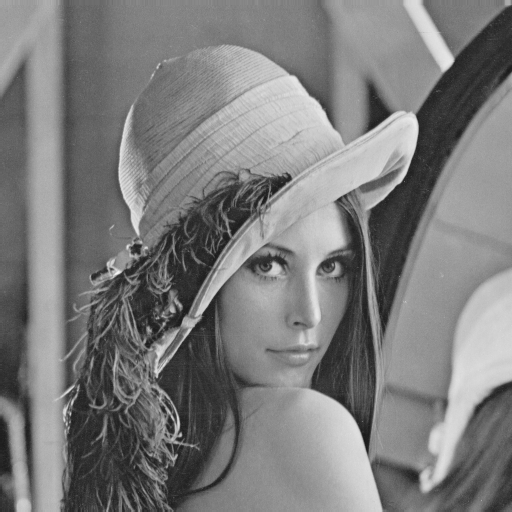

In [4]:
lenna = Image.open("Pictures/Lenna.png").convert('L')
lenna

### Gerando Tensor

In [14]:
transform = transforms.Compose([
    transforms.Resize((244, 244)),
    transforms.ToTensor(),
    transforms.Normalize((.5), (.5))
])

lenna_tensor = transform(lenna).unsqueeze(0)
lenna_tensor.shape

torch.Size([1, 1, 244, 244])

### Criando CNN

In [15]:
class CNN_M3(nn.Module):
    def __init__(self):
        super(CNN_M3, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=2, kernel_size=3, padding=1)
        
    def forward(self, x):
        x = self.conv1(x)
        return x

In [36]:
class CNN_M5(nn.Module):
    def __init__(self):
        super(CNN_M5, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=2, kernel_size=5, padding=1)
        
    def forward(self, x):
        x = self.conv1(x)
        return x

In [38]:
class CNN_M7(nn.Module):
    def __init__(self):
        super(CNN_M7, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=2, kernel_size=7, padding=1)
        
    def forward(self, x):
        x = self.conv1(x)
        return x

In [37]:
class CNN_M9(nn.Module):
    def __init__(self):
        super(CNN_M9, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=2, kernel_size=9, padding=1)
        
    def forward(self, x):
        x = self.conv1(x)
        return x

In [39]:
cnn_3 = CNN_M3()
cnn_5 = CNN_M5()
cnn_7 = CNN_M7()
cnn_9 = CNN_M9()

### Operação Convolucional

In [41]:
with torch.no_grad():
    output_3 = cnn_3(lenna_tensor)
    output_5 = cnn_5(lenna_tensor)
    output_7 = cnn_7(lenna_tensor)
    output_9 = cnn_9(lenna_tensor)

In [29]:
from median_filter import MedianPool2d
median_pool = MedianPool2d(kernel_size=3, stride=1, padding=1)

In [42]:
output_3 = median_pool.forward(output_3)
output_5 = median_pool.forward(output_5)
output_7 = median_pool.forward(output_7)
output_9 = median_pool.forward(output_9)

### Plotando Imagens

In [33]:
import matplotlib.pyplot as plt
import numpy as np

In [31]:
def plot_image(output):
    feature_map = output[0, 0].detach().numpy()

    # Normalizando o mapa de características
    feature_map -= feature_map.min()
    feature_map /= feature_map.max()

    # Gerando um mapa de calor
    heatmap = np.uint8(255 * feature_map)

    # Visualizando o mapa de calor
    plt.imshow(heatmap)
    plt.show()

##### Kernel Size 3

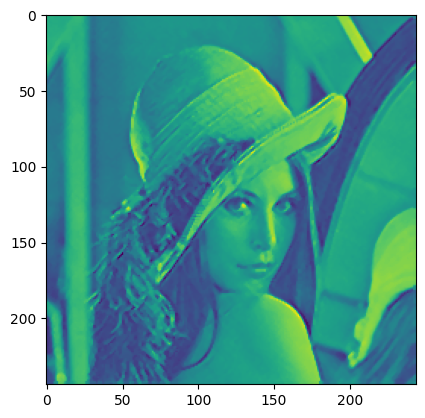

In [43]:
plot_image(output_3)

##### Kernel Size 5

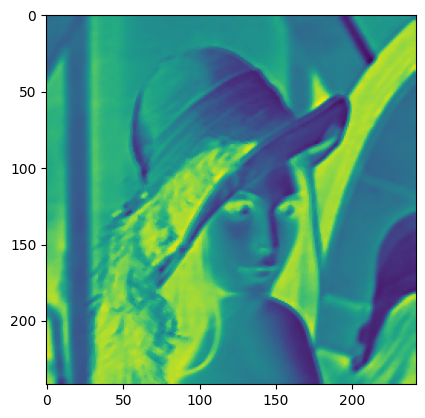

In [44]:
plot_image(output_5)

##### Kernel Size 7

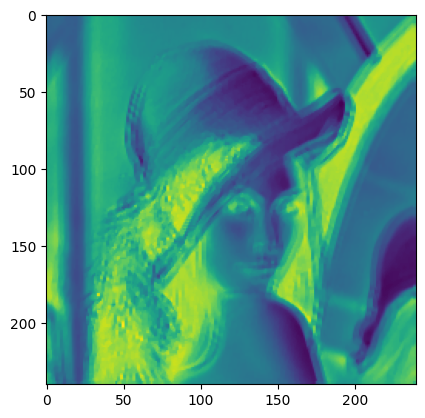

In [45]:
plot_image(output_7)

##### Kernel Size 9

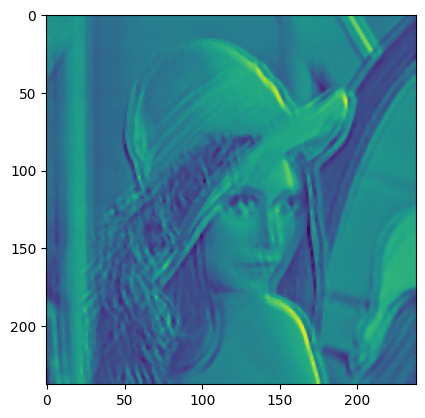

In [46]:
plot_image(output_9)